In [1]:
import numpy as np
from pyod.utils.data import generate_data
from pyod.models.knn import KNN
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, balanced_accuracy_score, roc_curve, RocCurveDisplay
import matplotlib.pyplot as plt

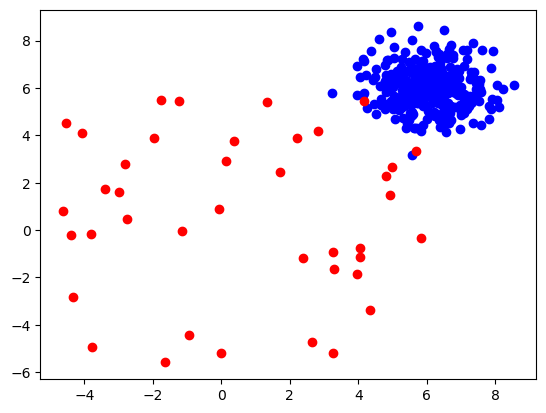

In [105]:
# ex 1 

x_train, x_test, y_train, y_test = generate_data(n_train=400, n_test=100, n_features=2, contamination=0.1, random_state=42)

# print(x_train.shape)
# print(y_train.shape)
# print(x_test.shape)
# print(y_test.shape)

plt.scatter(x_train[:360,0], x_train[:360, 1], color="blue")
plt.scatter(x_train[360:,0], x_train[360:, 1], color="red")
plt.show()

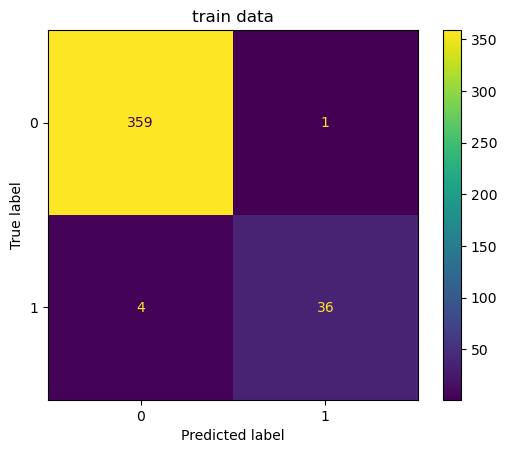

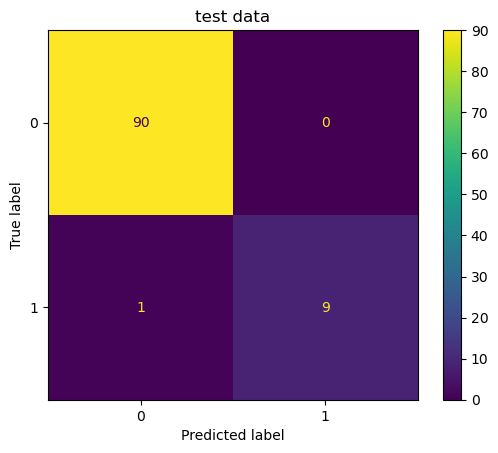

0.9486111111111111 0.95
(78,)


C:\Users\maria\anaconda3\envs\cuda\lib\site-packages\sklearn\metrics\_plot\roc_curve.py:189: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


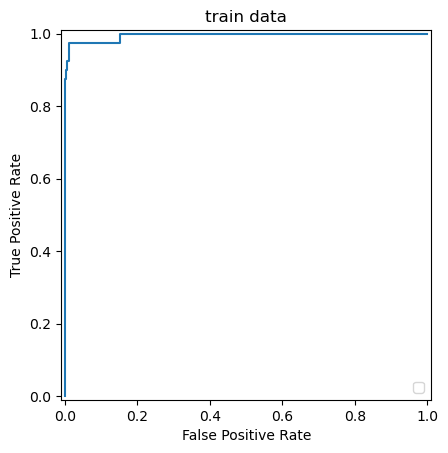

C:\Users\maria\anaconda3\envs\cuda\lib\site-packages\sklearn\metrics\_plot\roc_curve.py:189: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


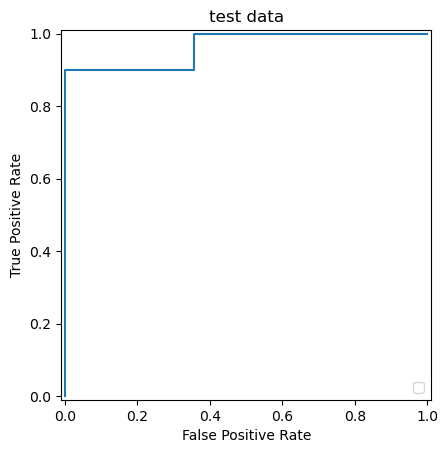

In [106]:
# ex 2
knn = KNN(contamination=0.1)
knn.fit(x_train)

train_pred = knn.predict(x_train)
test_pred = knn.predict(x_test)

train_data_cm = confusion_matrix(y_train, train_pred)
test_data_cm = confusion_matrix(y_test, test_pred)


cm_train = ConfusionMatrixDisplay(train_data_cm)
cm_train.plot()
plt.title("train data")
plt.show()

cm_test = ConfusionMatrixDisplay(test_data_cm)
cm_test.plot()
plt.title("test data")
plt.show()


train_ba = balanced_accuracy_score(y_train, train_pred)
test_ba = balanced_accuracy_score(y_test, test_pred)
print(train_ba, test_ba)


fpr, tpr, _ = roc_curve(y_train, knn.decision_function(x_train))
RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.title("train data")
plt.show()

fpr, tpr, _ = roc_curve(y_test, knn.decision_function(x_test))
RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.title("test data")
plt.show()

In [164]:
# ex 3 

x_train, _, y_train, _ = generate_data(n_train=1000, n_test=0, n_features=1, contamination=0.1, random_state=42)
mean = np.mean(x_train)
std = np.std(x_train)
z_scores = np.abs((x_train - mean)) / std

thresh = np.quantile(z_scores, 0.9)

x_preds = np.array([1 if x >= thresh else 0 for x in z_scores]) 

balanced_acc = balanced_accuracy_score(y_train, x_preds)
print(balanced_acc)


0.8388888888888888


In [31]:
# ex 4

mean = np.array([1, 2])
cov = np.array([[1, 1],[1, 5]])

# verificam ca matricea aleasa e pozitiv definita
print(np.all(np.linalg.eigvals(cov)))

x = np.random.multivariate_normal(np.array([0, 0]), np.array([[1, 0], [0, 1]]), size=100)
l = np.linalg.cholesky(cov) 

y = x @ l + mean

z_scores = np.array([np.sqrt((a - mean).transpose() @ np.linalg.inv(cov) @ (a - mean)) for a in y])

thresh = np.quantile(z_scores, 0.9)
y_preds = np.array([1 if x >= thresh else 0 for x in z_scores])



True
